# This notebook is used to:
### - analyse the cleaned data with plots 
### - do a statistical test with the cleaned data
### - do the PCA with the imputed data
<br><br>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import decomposition, preprocessing
import altair as alt
from altair import pipe, limit_rows, to_values
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

import projet_functions_3 as pf
import pca_functions as pca_pf

### First look on data

In [2]:
# to get reliable results

np.random.seed(0)

#### Load clean data

In [3]:
data_path = "D:\OpenClassrooms\projet_3\clean_data.csv"

df = pd.read_csv(data_path, sep=',')
print('shape =',df.shape)

shape = (320639, 45)


In [4]:
# If test mode active, only a sample of the data is used to make calculations faster.

test_mode = False

In [5]:
# for bigger plot
scale_factor = 2
default_size = [6.4, 4.8]
plt.rcParams['figure.figsize'] = [n * scale_factor for n in default_size]

#### Show number of values and percentage completion of each column

In [6]:
# make dict with nb values and percentage completion of each column

completion_dict = {}
for column in df.columns:
    nb_values = df[column].notna().sum()
    percent = 100 * nb_values / df.shape[0]
    completion_dict[column] = [nb_values, percent]

    
# shows percentage of completion for each column    

print('column_name : nb_values  (percentage_of_completion)', '\n\n')
for column in completion_dict:
    nb_values = completion_dict[column][0]
    percent = completion_dict[column][1]
    print(f'{column} : {nb_values}  ({int(percent)}%)')
    print()


column_name : nb_values  (percentage_of_completion) 


product_name : 302883  (94%)

generic_name : 52768  (16%)

brands : 292267  (91%)

categories : 84375  (26%)

categories_tags : 84374  (26%)

categories_fr : 84375  (26%)

countries_fr : 320359  (99%)

additives_n : 320639  (100%)

additives : 154616  (48%)

ingredients_from_palm_oil_n : 248850  (77%)

ingredients_that_may_be_from_palm_oil_n : 248850  (77%)

nutrition_grade_fr : 221147  (68%)

pnns_groups_1 : 91498  (28%)

pnns_groups_2 : 94475  (29%)

main_category : 84351  (26%)

main_category_fr : 84351  (26%)

energy_100g : 260475  (81%)

fat_100g : 243799  (76%)

saturated-fat_100g : 229483  (71%)

monounsaturated-fat_100g : 22820  (7%)

polyunsaturated-fat_100g : 22857  (7%)

trans-fat_100g : 143236  (44%)

cholesterol_100g : 144032  (44%)

carbohydrates_100g : 243481  (75%)

sugars_100g : 244876  (76%)

fiber_100g : 200814  (62%)

proteins_100g : 259819  (81%)

salt_100g : 255262  (79%)

alcohol_100g : 4128  (1%)

vitamin-a_

In [7]:
# reduce size of dataframe for testing phase

nb_samples = 10000
if test_mode:
    df = df.sample(nb_samples)
    print(df.shape)

#### Plot of column completion

<AxesSubplot:>

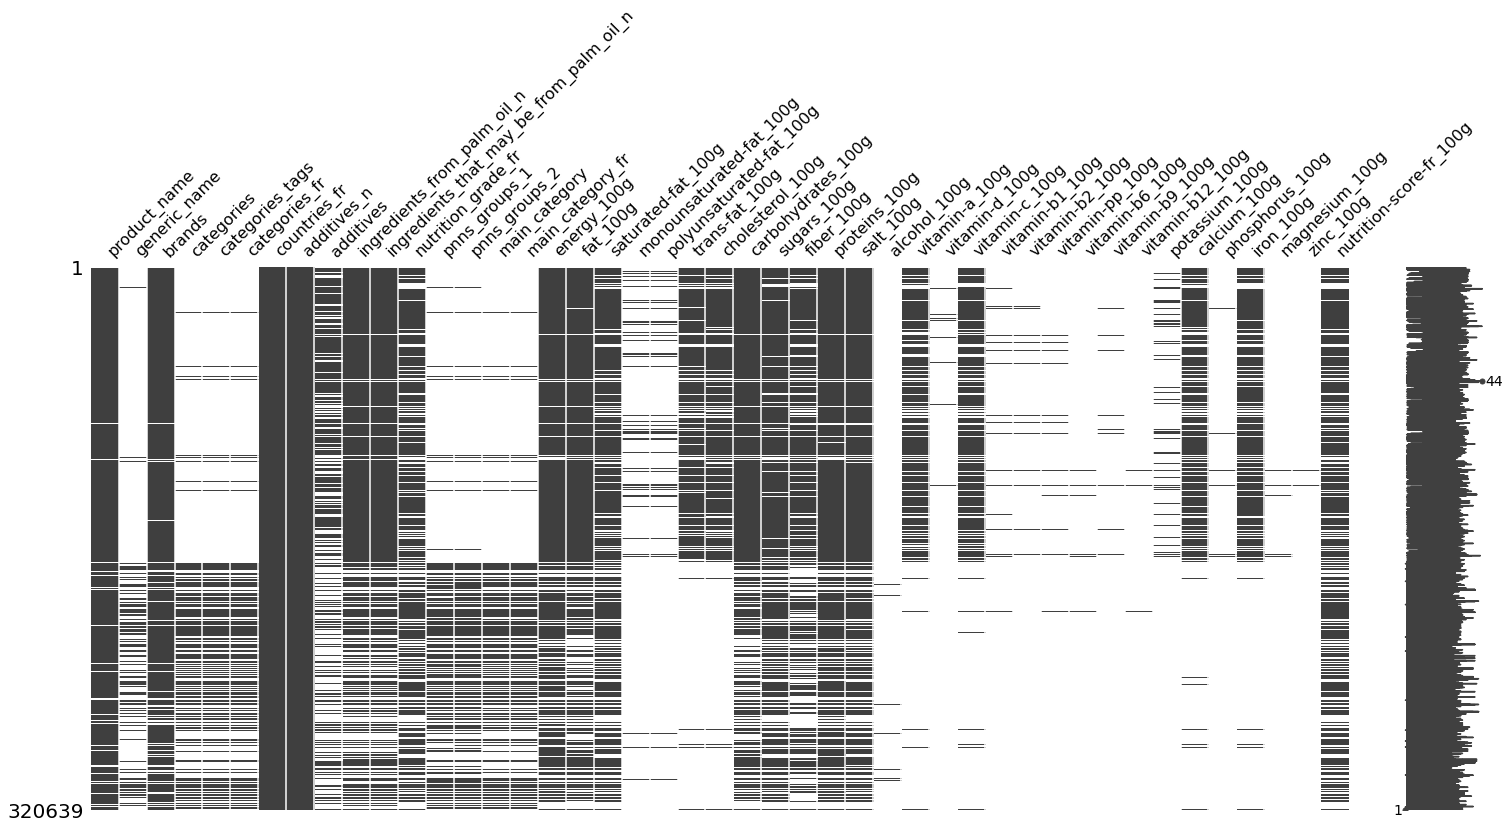

In [8]:
msno.matrix(df)

#### Plot all quantitative columns' distributions

In [9]:
# make list of quantitative columns

quantitative_columns = []
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quantitative_columns.append(column)

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


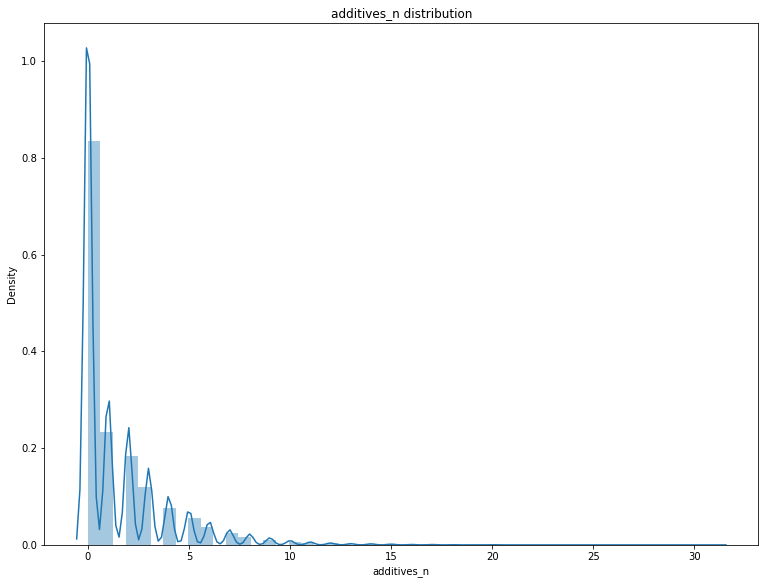

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


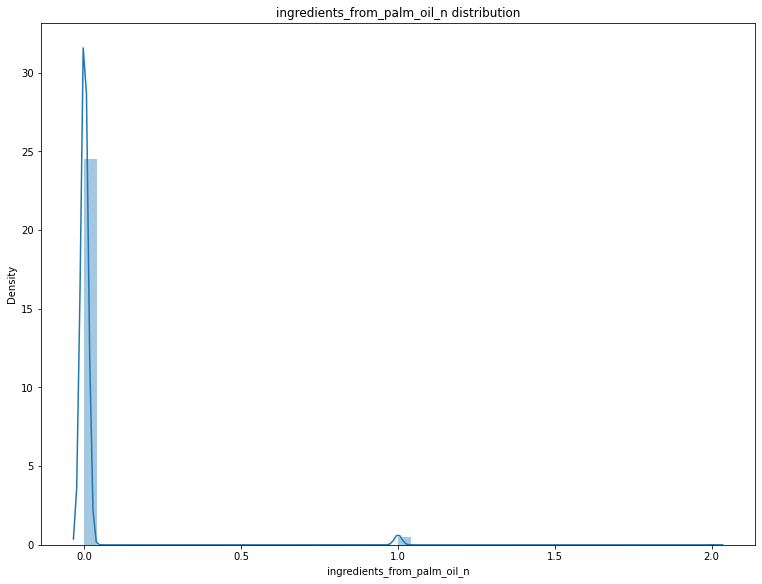

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


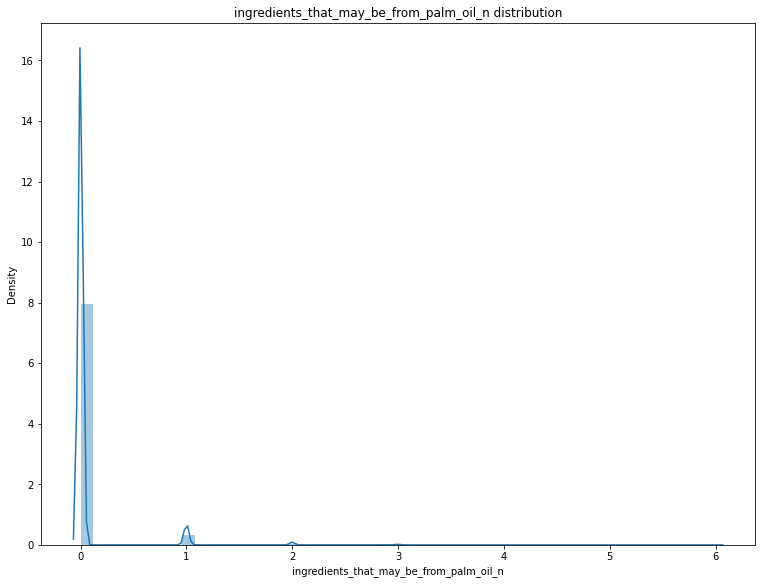

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


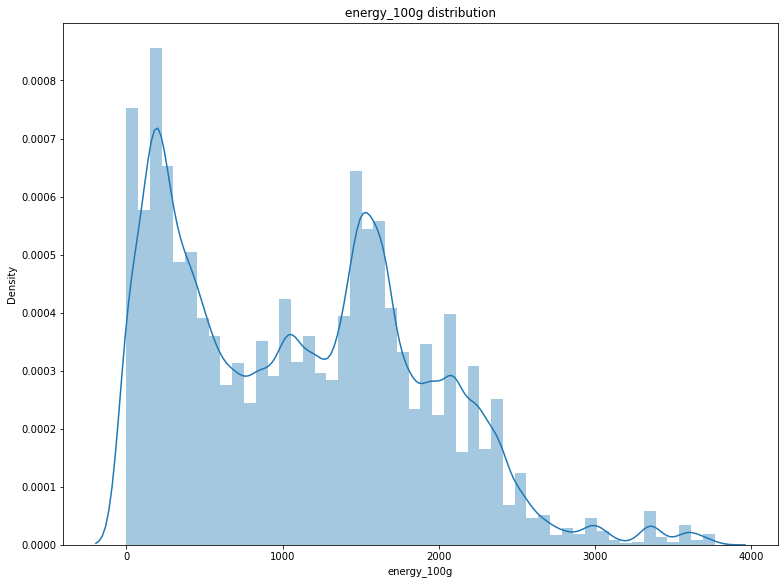

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


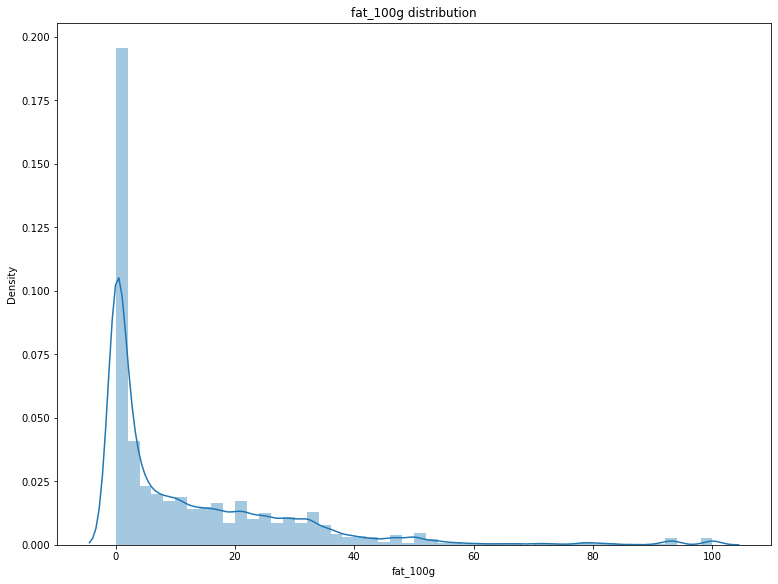

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


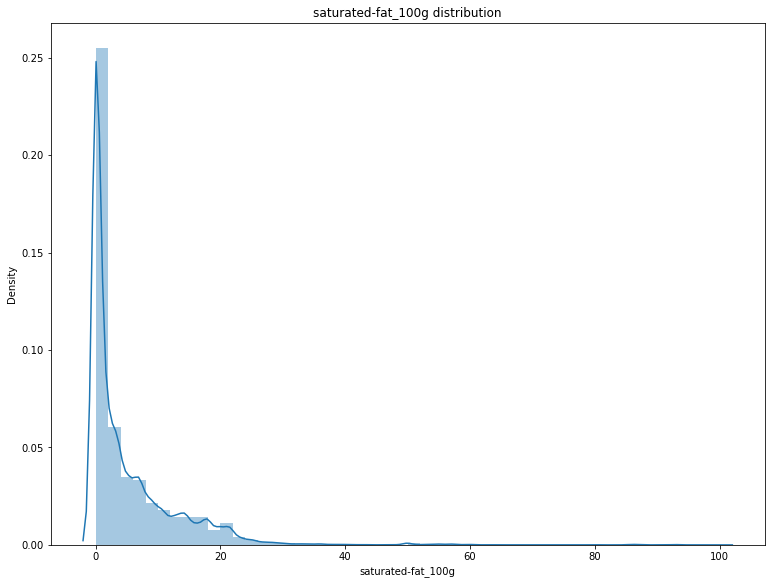

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


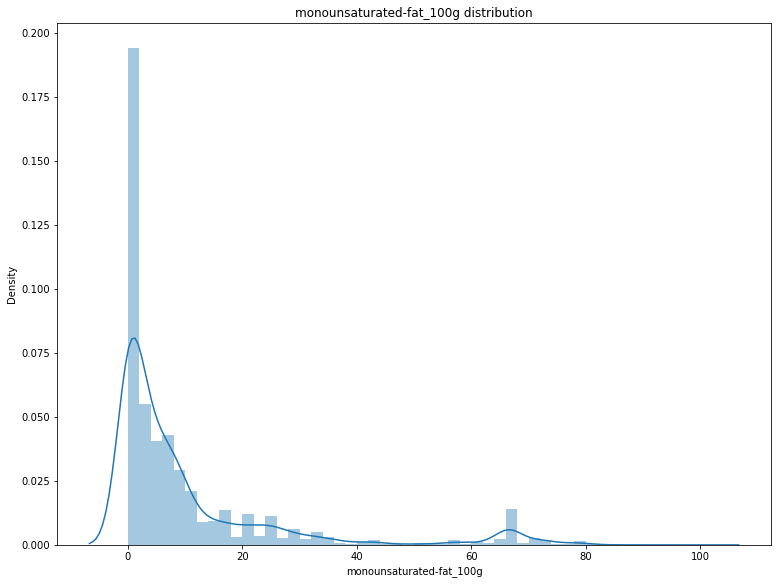

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


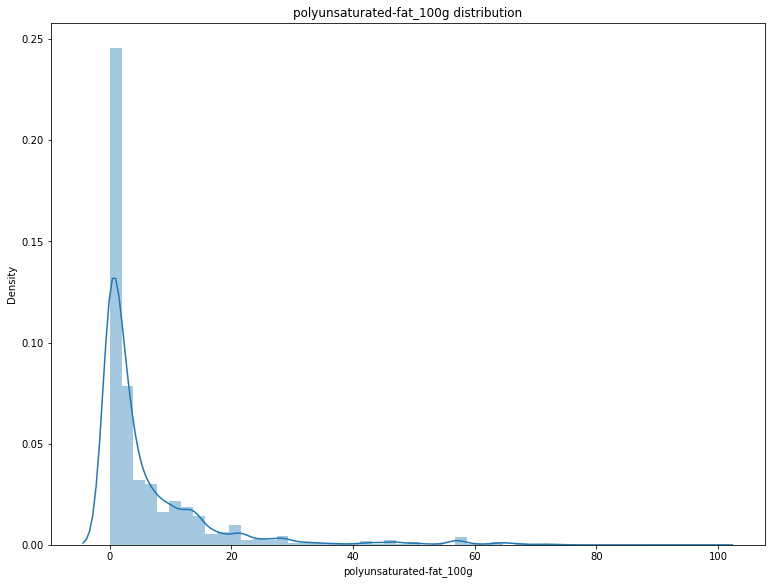

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


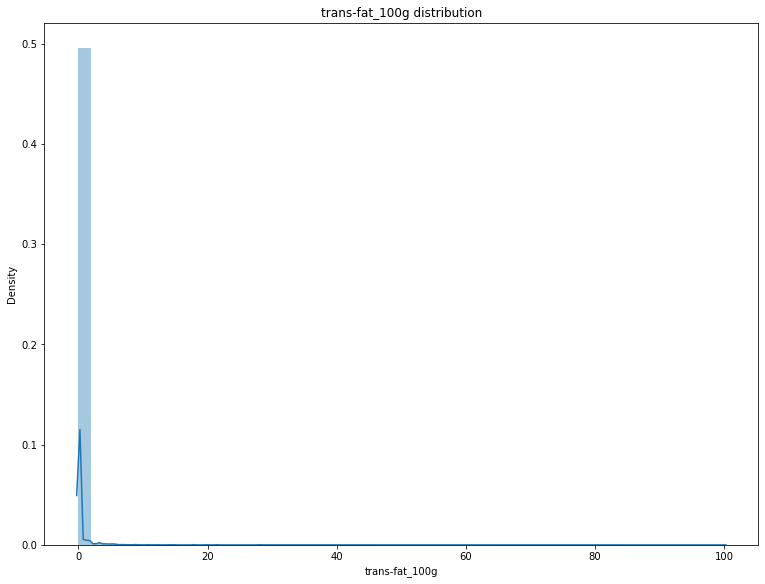

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


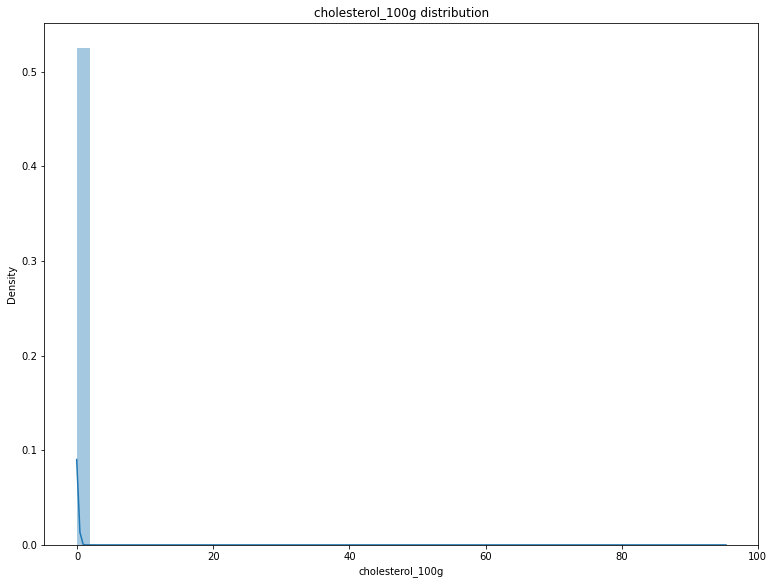

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


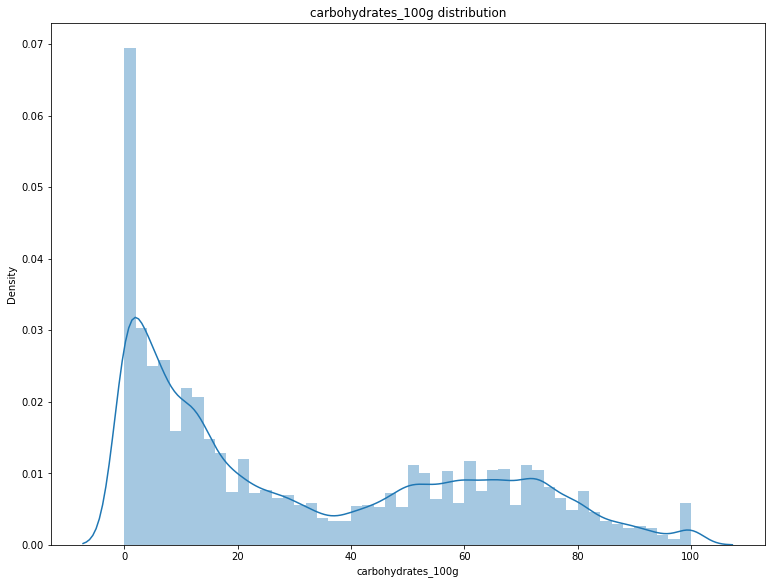

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


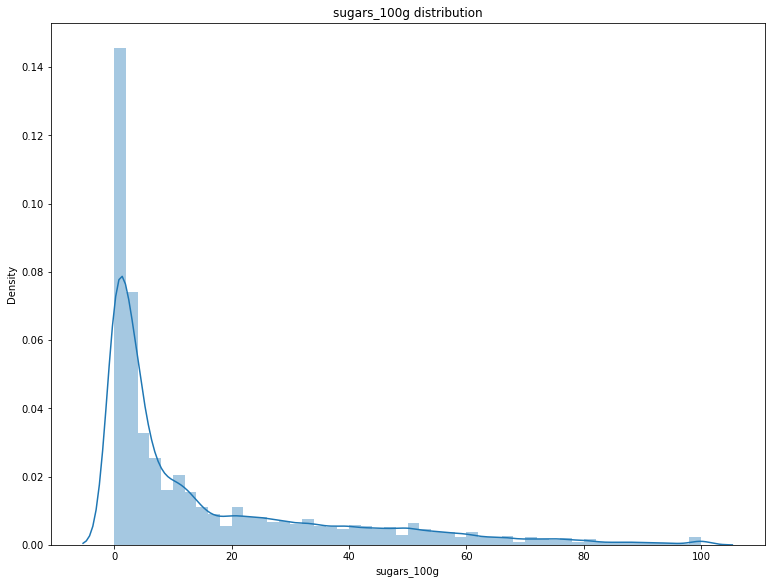

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


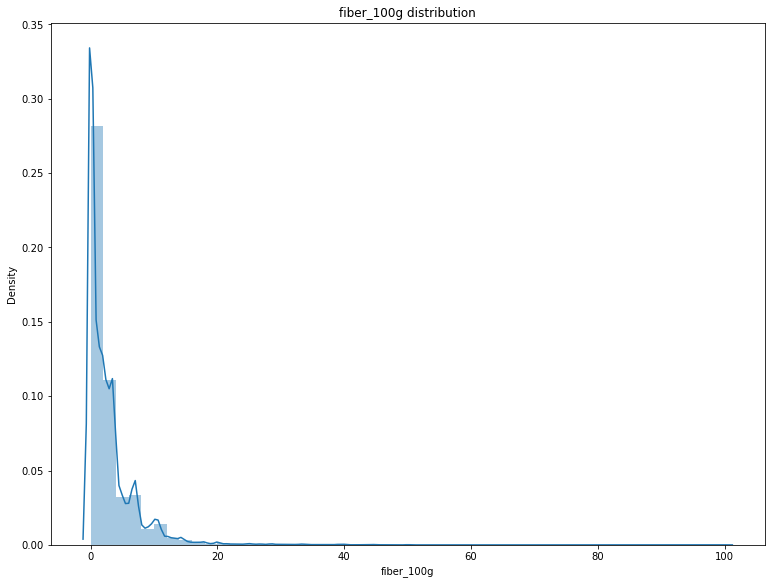

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


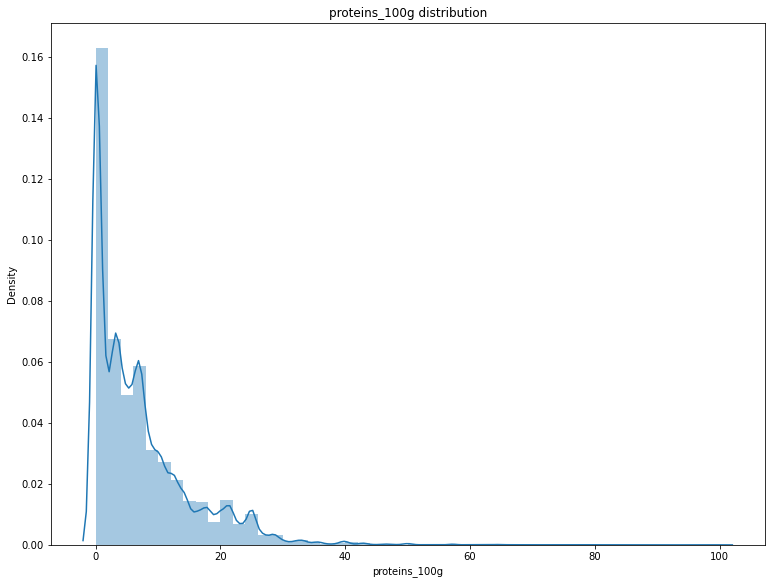

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


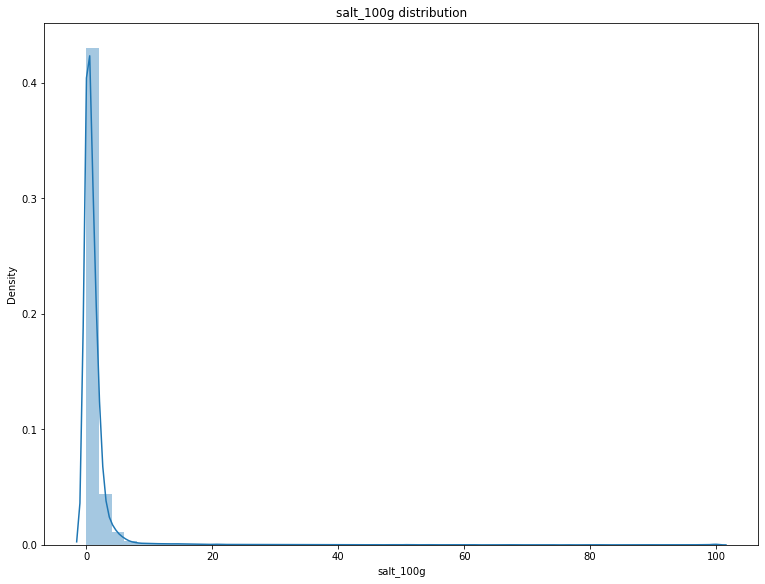

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


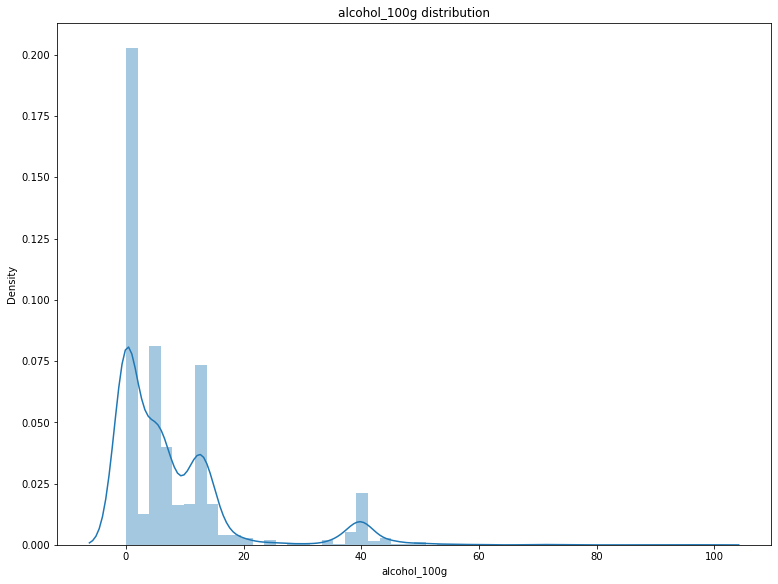

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


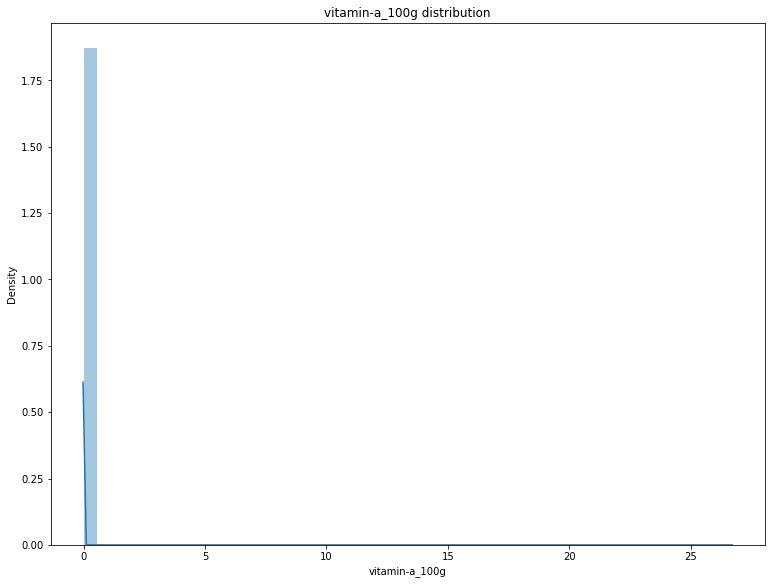

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


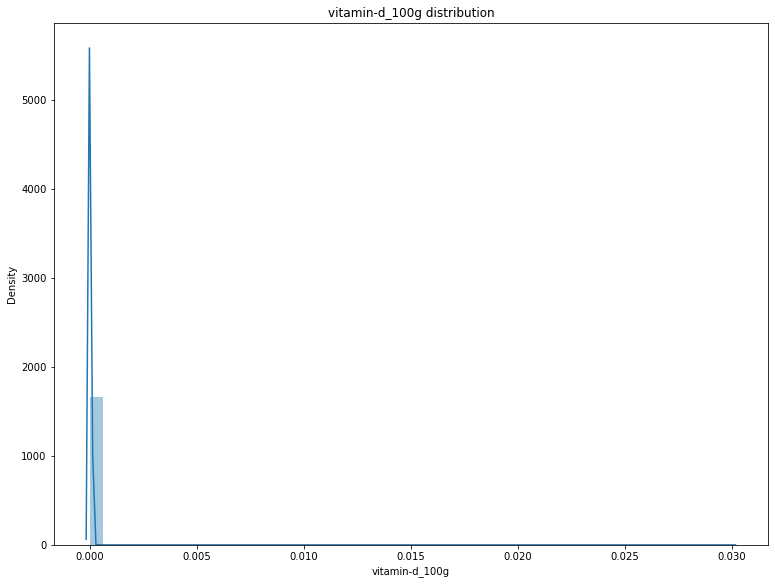

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


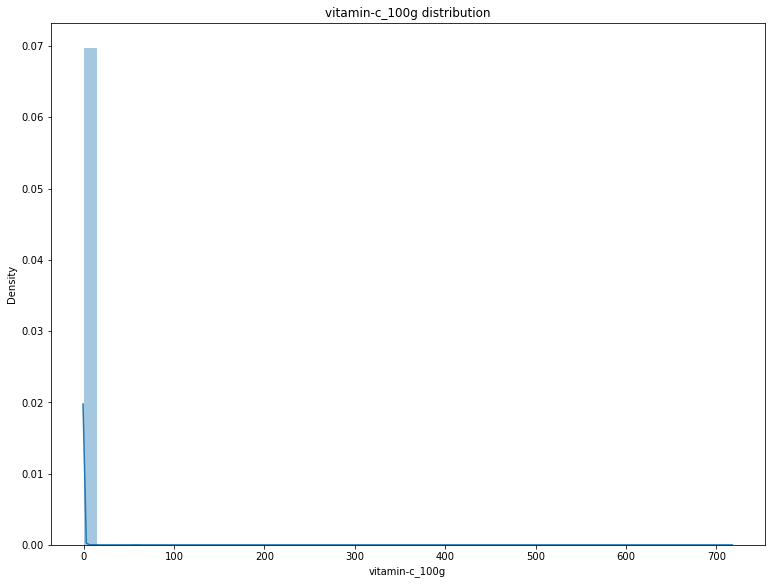

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


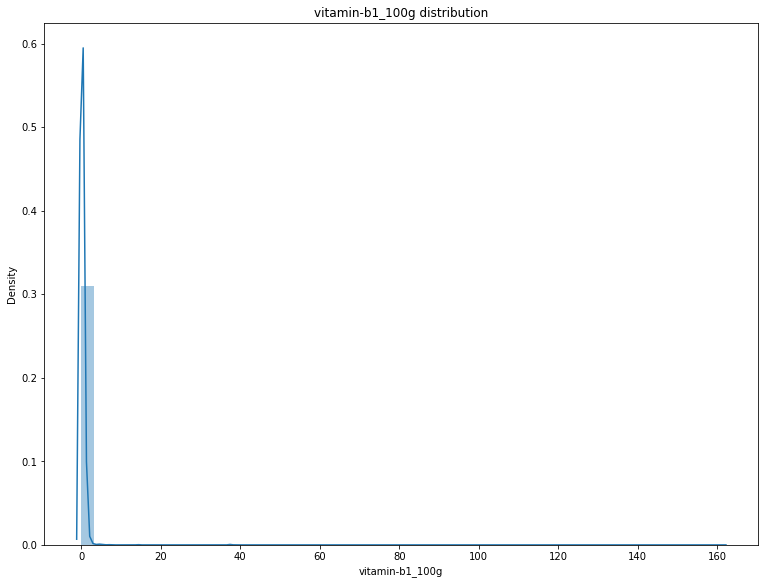

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


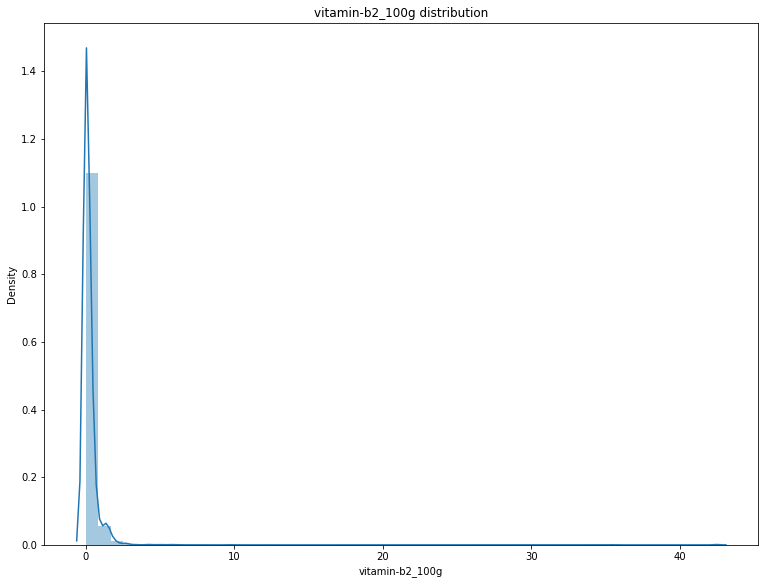

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


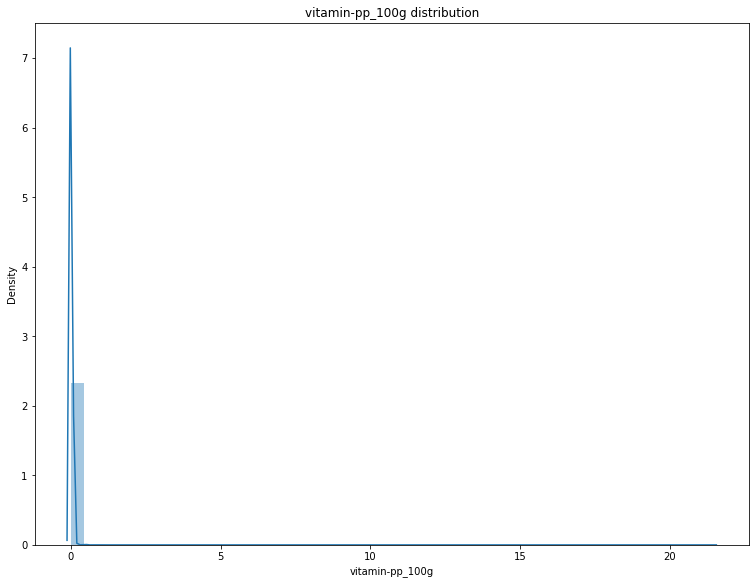

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


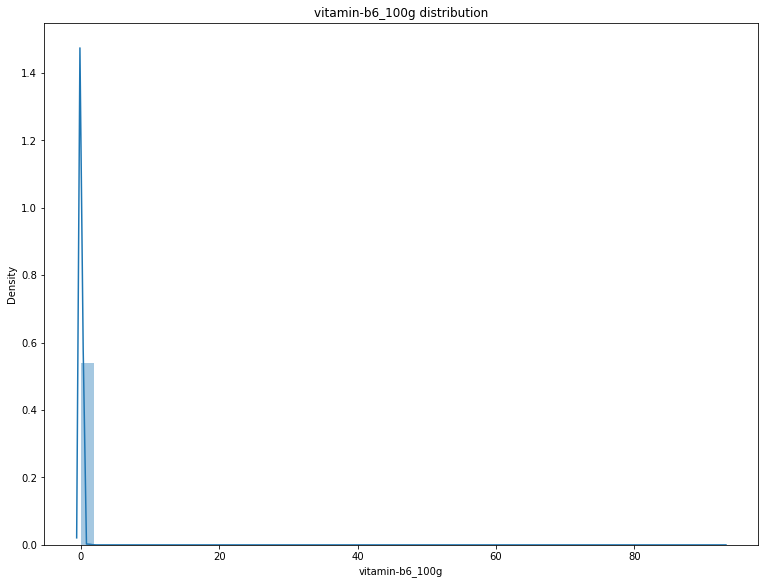

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


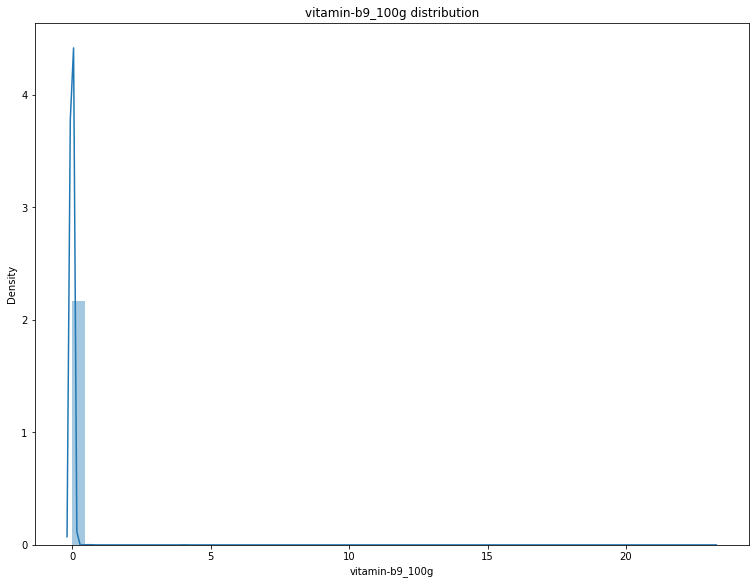

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


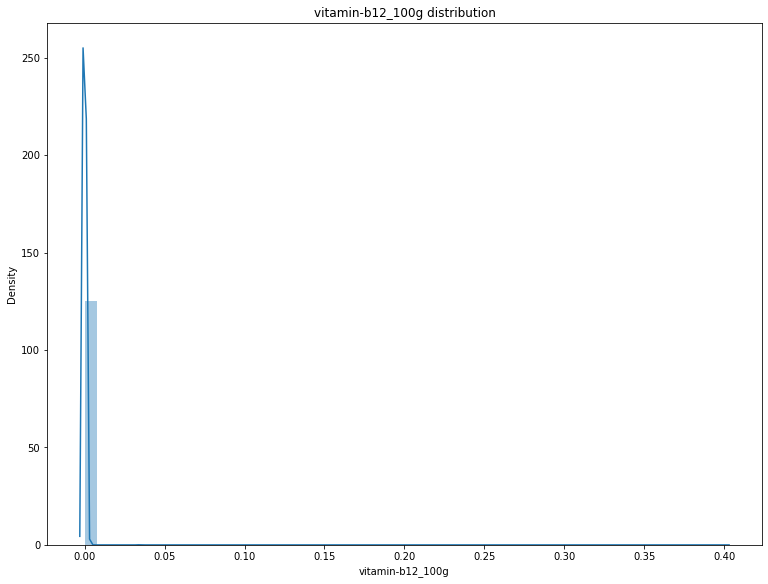

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


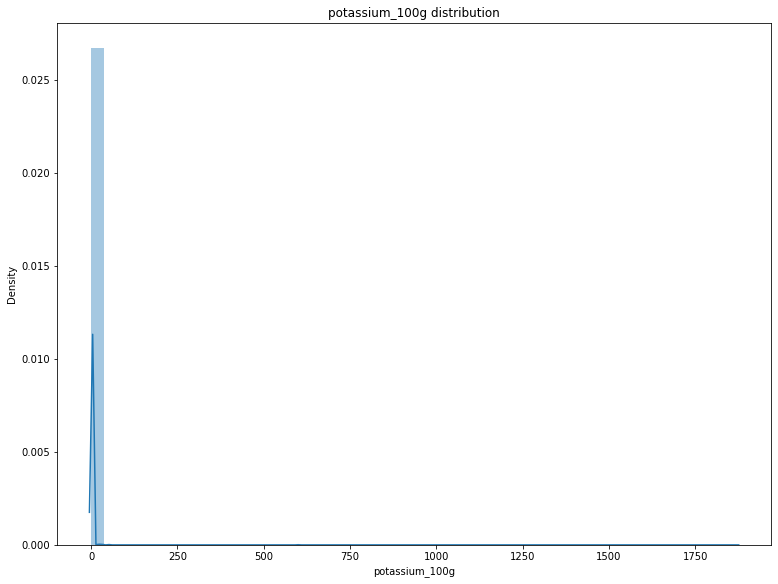

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


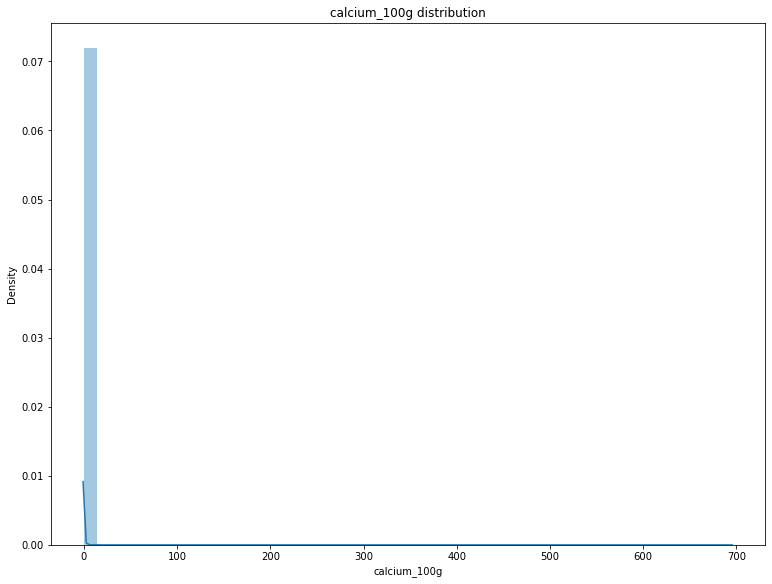

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


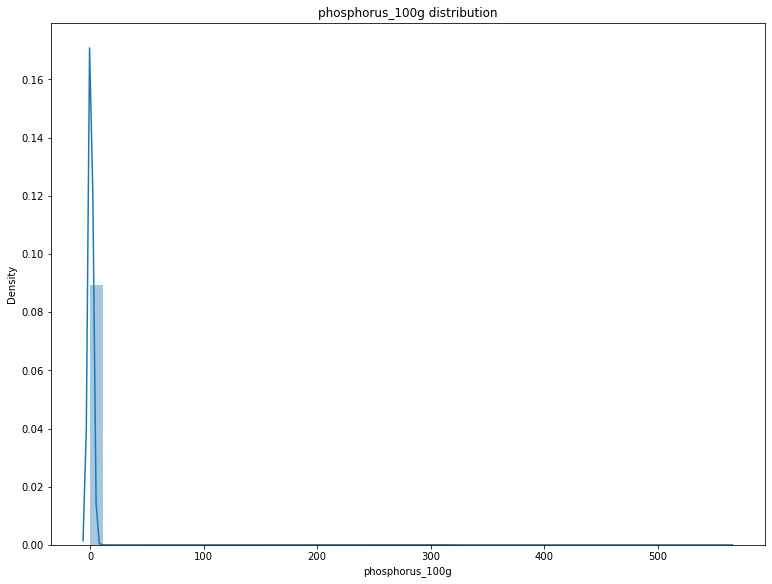

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


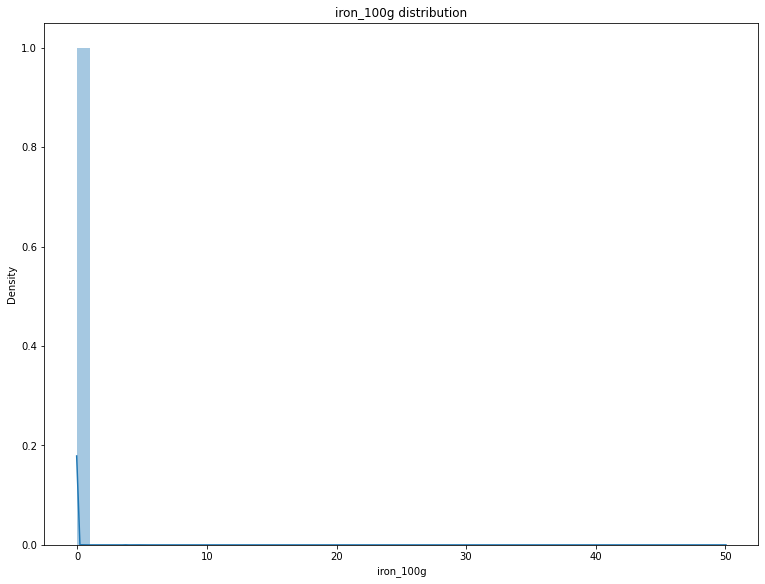

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


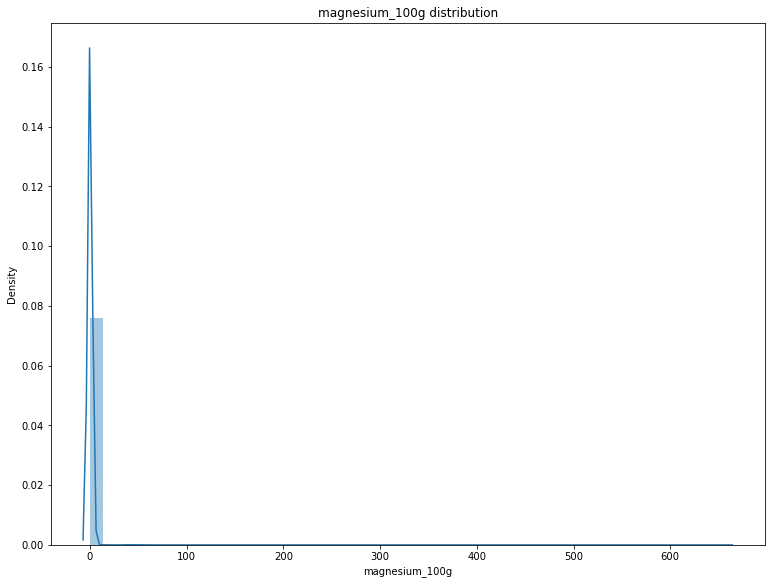

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


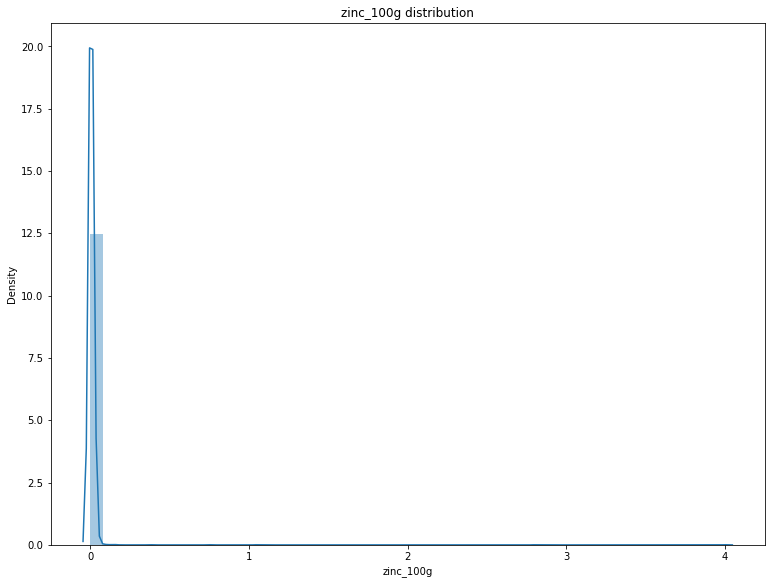

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


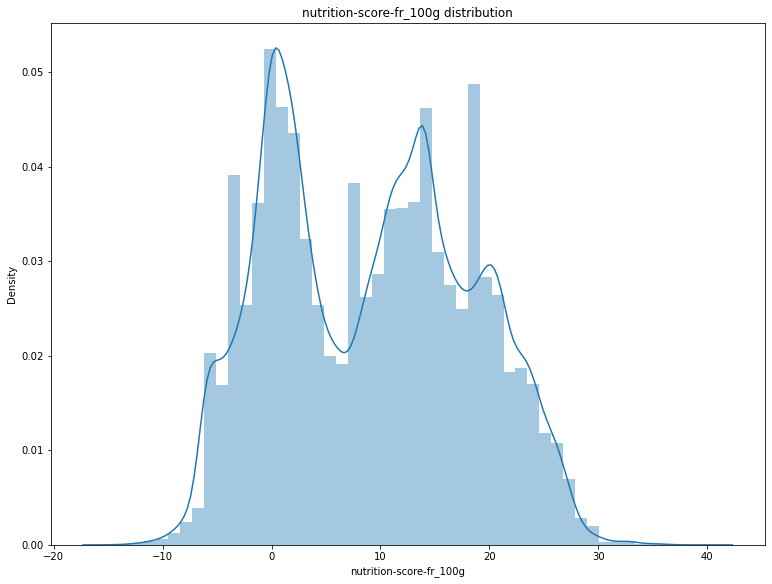

In [10]:
for column in quantitative_columns:
    plt.figure()
    plt.title(column + ' distribution')
    sns.distplot(df[column])
    plt.show()

#### Correlations

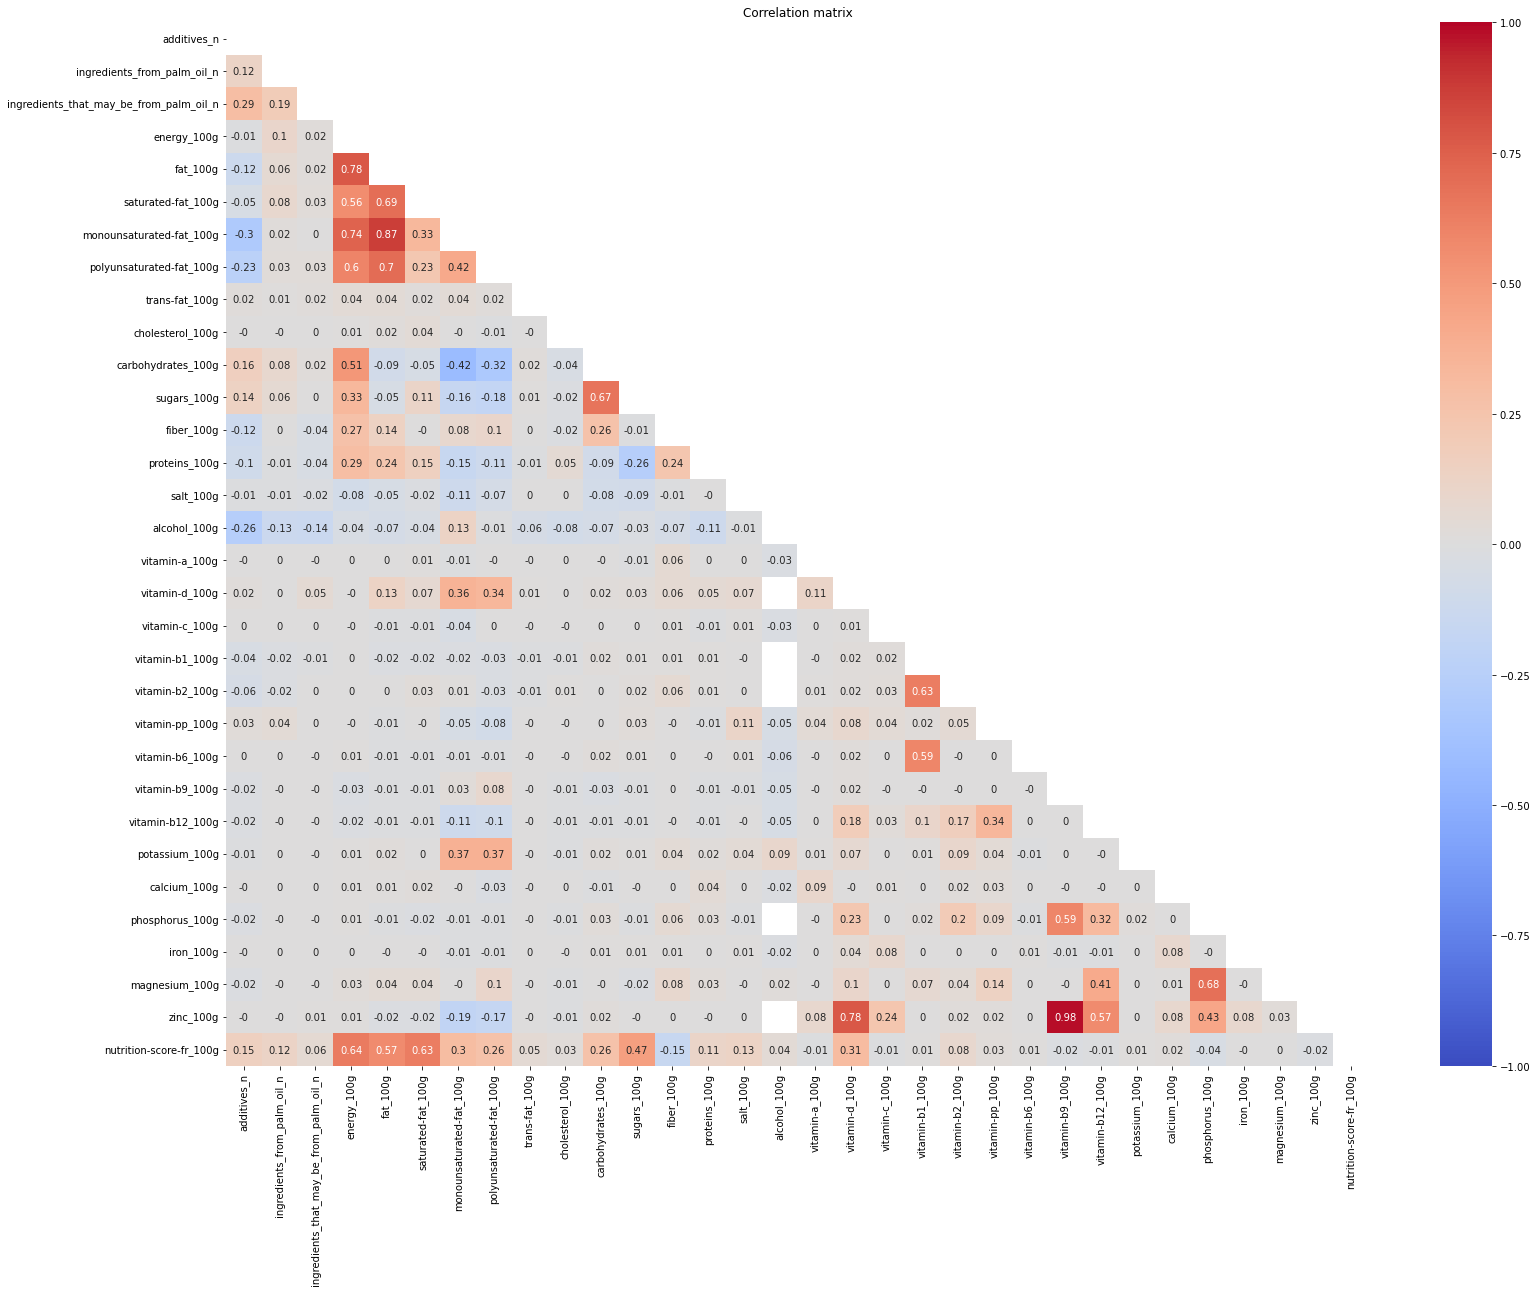

In [11]:
# for bigger plot
temp_scale = 4
plt.rcParams['figure.figsize'] = [n * temp_scale for n in default_size]

corr = pf.correlation_matrix(quantitative_columns, df)

# back to normal size plot
plt.rcParams['figure.figsize'] = [n * scale_factor for n in default_size]

### Nutri-grade vs nutri-score

--------------------
nutrition_grade_fr
-------------------- 

unique values : 6
duplicates :    320633

nb of index 'a'= 35626


{'NaN': 99492, 'd': 62737, 'b': 34234, 'c': 45530, 'a': 35626, 'e': 43020}

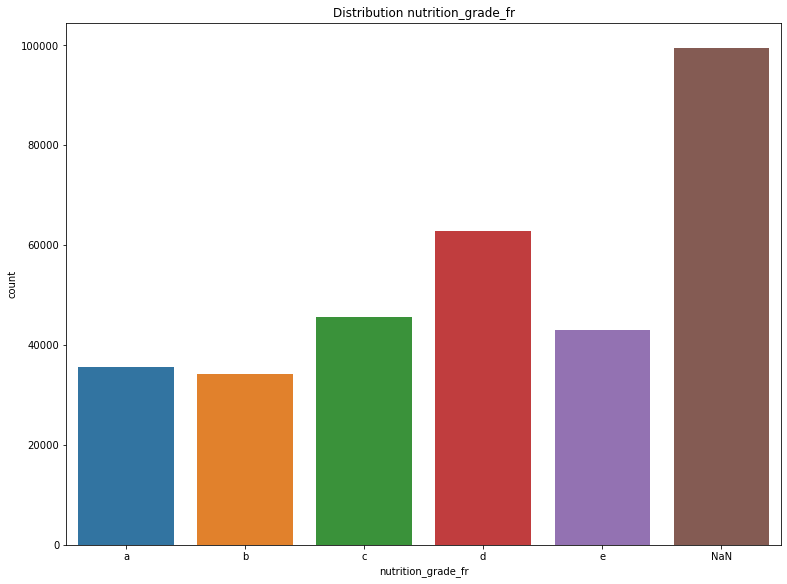

In [12]:
order_grades = ['a', 'b', 'c', 'd', 'e']
pf.plot_ordinal_column('nutrition_grade_fr', order_grades, df)

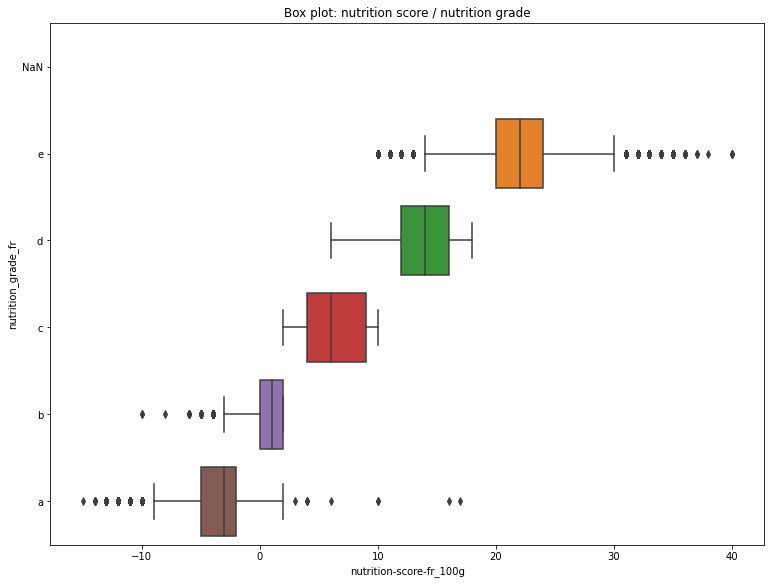

In [13]:
plt.figure()
plt.title('Box plot: nutrition score / nutrition grade')
sns.boxplot(x='nutrition-score-fr_100g', y='nutrition_grade_fr', data=df, order=reversed(order_grades))
plt.show()

#### Nutri-grade values overlap:
The nutri-grade formula is modified for certain products
(especially liquids such as oils or various drinks).<br>
This may explain the lack of clear boundaries between categories. 

### Nb additives vs nutri-grade

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


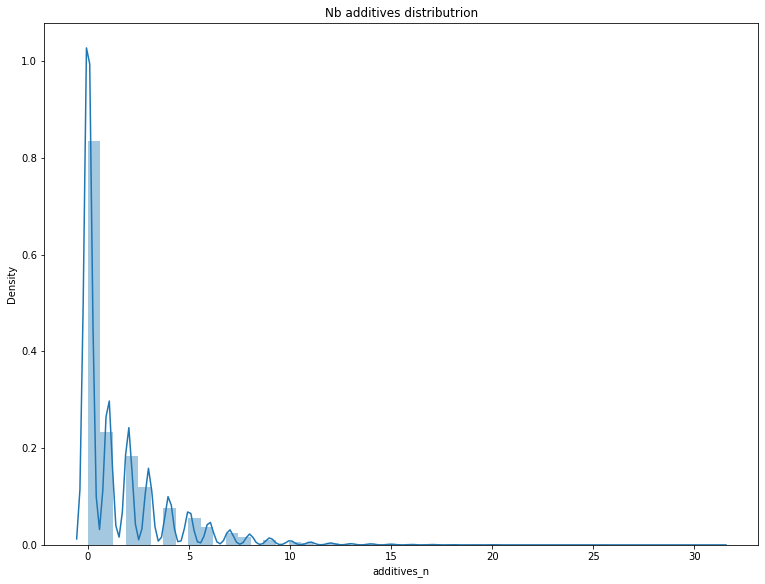

count = 320639
max = 31.0


In [14]:
plt.figure()
plt.title('Nb additives distributrion')
sns.distplot(df['additives_n'])
plt.show()

print('count =', df['additives_n'].count())
print('max =', df['additives_n'].max())

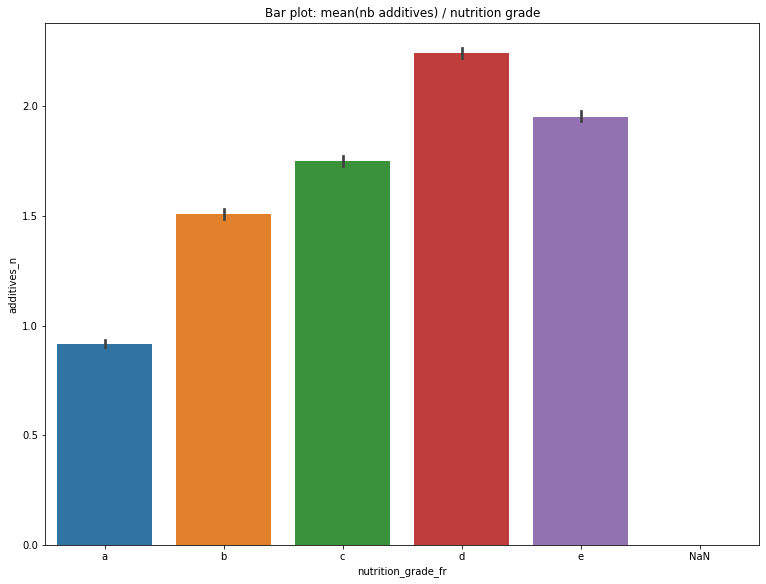

In [15]:
plt.figure()
plt.title('Bar plot: mean(nb additives) / nutrition grade')
sns.barplot(y='additives_n', x='nutrition_grade_fr', data=df, order=order_grades)
plt.show()

### Nb additives vs nutri-score

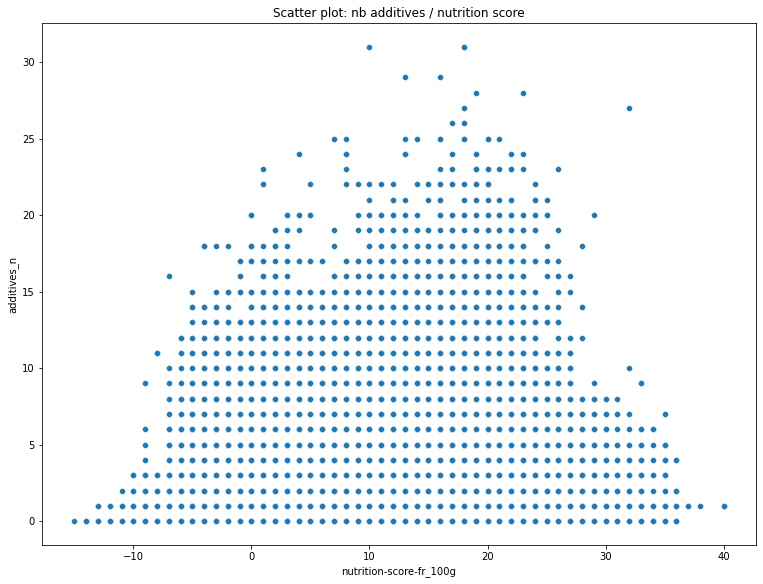

In [16]:
plt.figure()
plt.title('Scatter plot: nb additives / nutrition score')
sns.scatterplot(y='additives_n', x='nutrition-score-fr_100g', data=df)
plt.show()

### Interactive scatterplot

In [17]:
max_rows = 5000
point_size = 180

tooltip = ['product_name', 
           'additives_n', 
           'nutrition-score-fr_100g', 
           'nutrition_grade_fr'
          ]


df_interact = df.sample(max_rows)
alt.Chart(df_interact).mark_circle(size=point_size).encode(
    x='nutrition-score-fr_100g',
    y='additives_n',
    color='nutrition_grade_fr',
    tooltip=tooltip
   ).properties(width=700,
                height=600
               )

alt.Chart(...)

This plot is the same as the one before, but interactive

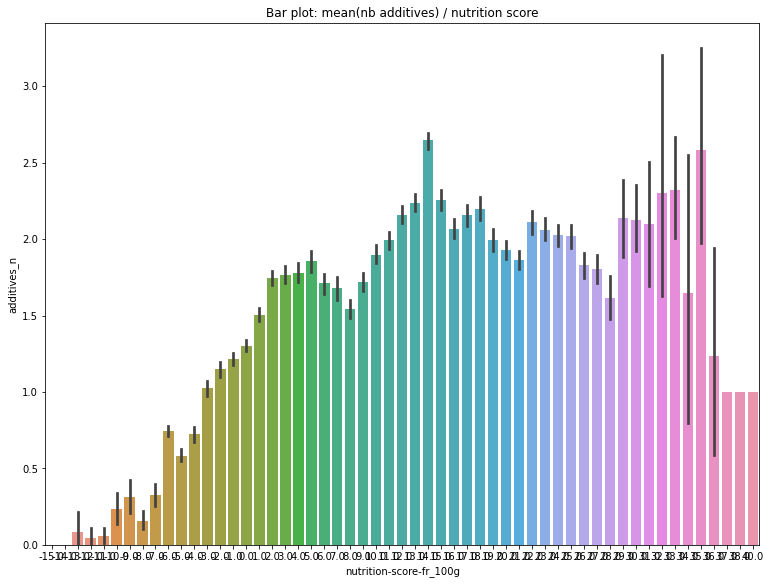

In [18]:
plt.figure()
plt.title('Bar plot: mean(nb additives) / nutrition score')
sns.barplot(y='additives_n', x='nutrition-score-fr_100g', data=df)
plt.show()

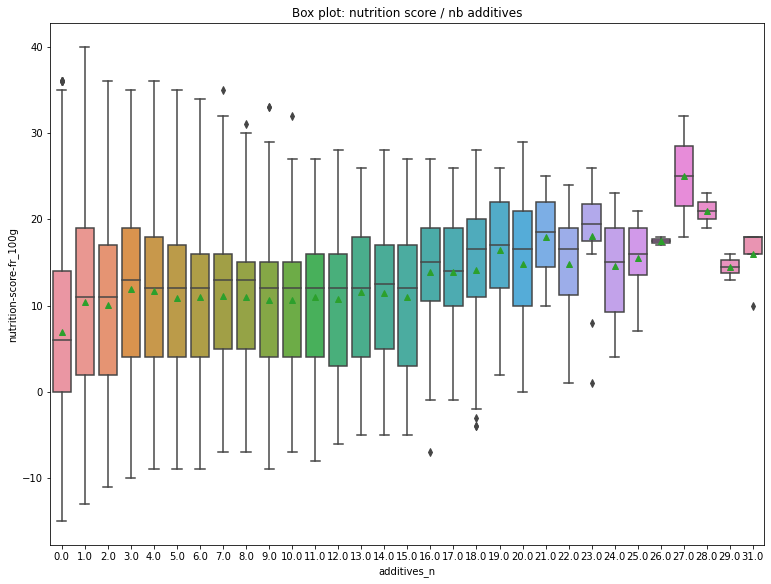

In [19]:
plt.figure()
plt.title('Box plot: nutrition score / nb additives')
sns.boxplot(x='additives_n', y='nutrition-score-fr_100g', data=df, showmeans=True)
plt.show()

On this box plot, the mean of each category is shown by the green triangles.

## <br>Statistical test

### Hypothesis:
#### The number of additives has no influence on the nutri-score<br><br>(i.e. the nutri-score is not usefull for guessing the number of additives in a product).

In [20]:
qualitative_column = 'additives_n'
quantitative_column = 'nutrition-score-fr_100g'

#### <br>If the quantitative data is normally distributed, ANOVA can be used.<br><br>Check if 'nutrition-score-fr_100g' is normaly distributed with a quantile-quantile plot:

<Figure size 921.6x691.2 with 0 Axes>

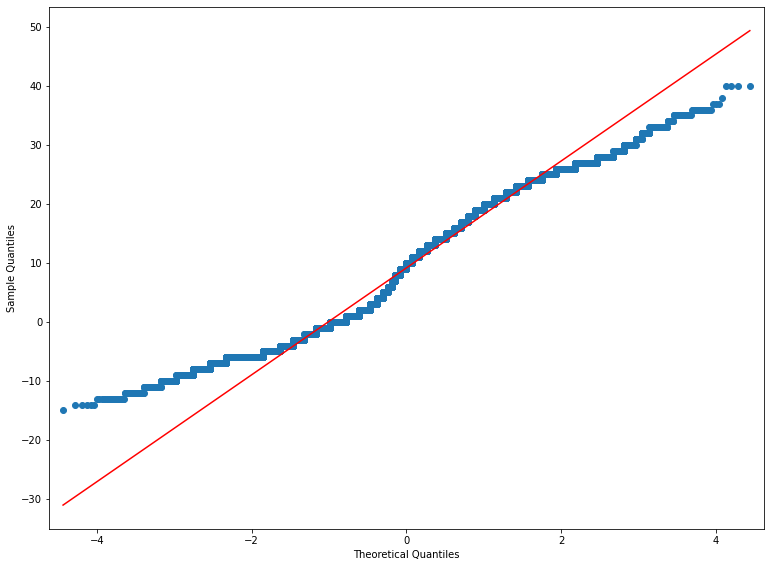

In [21]:
plt.figure()
qqplot(df[quantitative_column].dropna(), line='s')
plt.show()

Except for the ends, the distribution is close to normal.

#### More details on the quantitative column's distribution

C:\Users\Vincent\Anaconda3\envs\oc_projet_3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


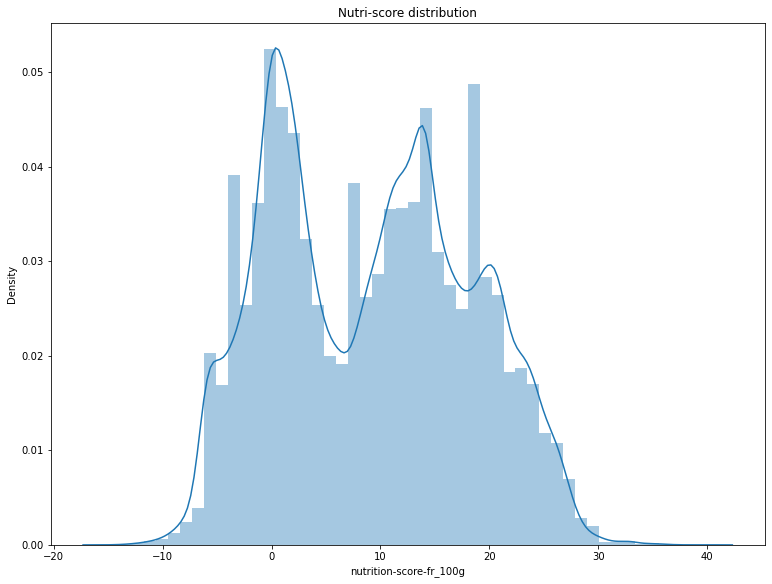

skewness = 0.115
kurtosis = -1.019


In [22]:
plt.figure()
plt.title('Nutri-score distribution')
sns.distplot(df[quantitative_column])
plt.show()


rounding = 3

skewness = df[quantitative_column].skew()
print('skewness =', round(skewness, rounding))

kurtosis = df[quantitative_column].kurtosis()
print('kurtosis =', round(kurtosis, rounding))

### <br>ANOVA hypothesis
#### H0: the means of each group are equal
#### H1: at least one of the means is different from the others

#### <br>Get sample of data for the test

In [23]:
ratio = 0.05

sample_size = round(df.shape[0] * ratio)
print('sample size =', sample_size)
df_test = df[[qualitative_column, quantitative_column]].sample(sample_size)

sample size = 16032


#### ANOVA test

In [24]:
a = df_test['additives_n']
n = df_test['nutrition-score-fr_100g']
model = ols('a ~ n',data=df_test).fit()

table_type_1 = sm.stats.anova_lm(model, typ=1)
print(table_type_1, '\n')


               df        sum_sq      mean_sq           F        PR(>F)
n             1.0   1420.789636  1420.789636  225.839509  1.524481e-50
Residual  11014.0  69290.697292     6.291147         NaN           NaN 



#### PR(>F) is the p-value. <br><br>It is less than 0.05, so there is evidence that at least one of the group means differs from the others (probably the last ones).<br><br>Therefore the nutri-score could be usefull in certain cases to guess the number of additives in a product.

## <br><br>Now use the imputed dataset for the PCA<br><br>

In [25]:
data_path = "D:\OpenClassrooms\projet_3\imputed_data.csv"

df = pd.read_csv(data_path, sep=',')
print('shape =',df.shape)

shape = (320639, 31)


In [26]:
# reduce size of dataframe for testing phase

if test_mode:
    df = df.sample(nb_samples)
    print(df.shape)

#### List of quantitative columns used in PCA

In [27]:
quantitative_columns = []
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quantitative_columns.append(column)
        print(column)

additives_n
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
energy_100g
fat_100g
saturated-fat_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g


### PCA

#### (last 3 plots are colored by number of additives)

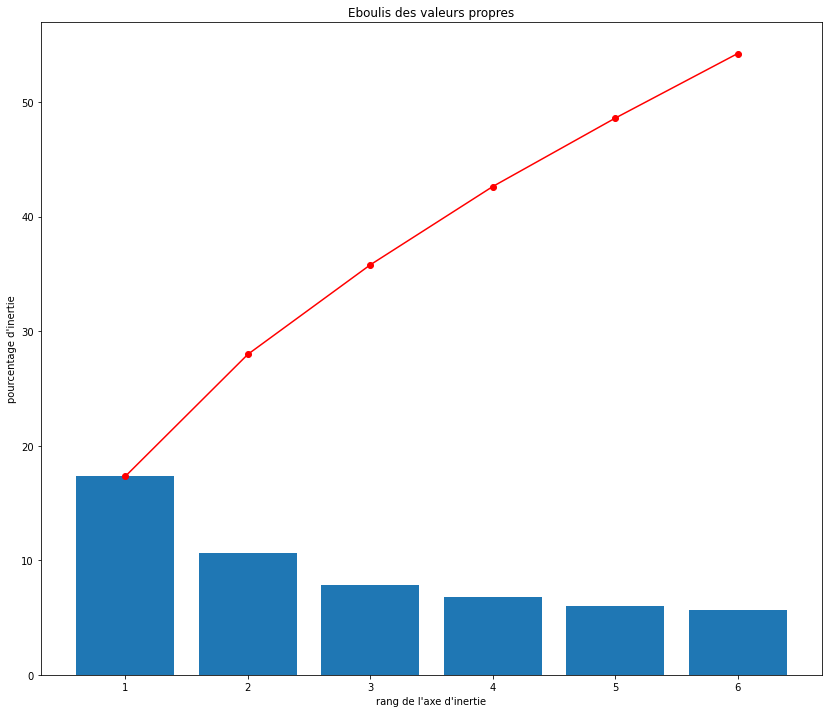

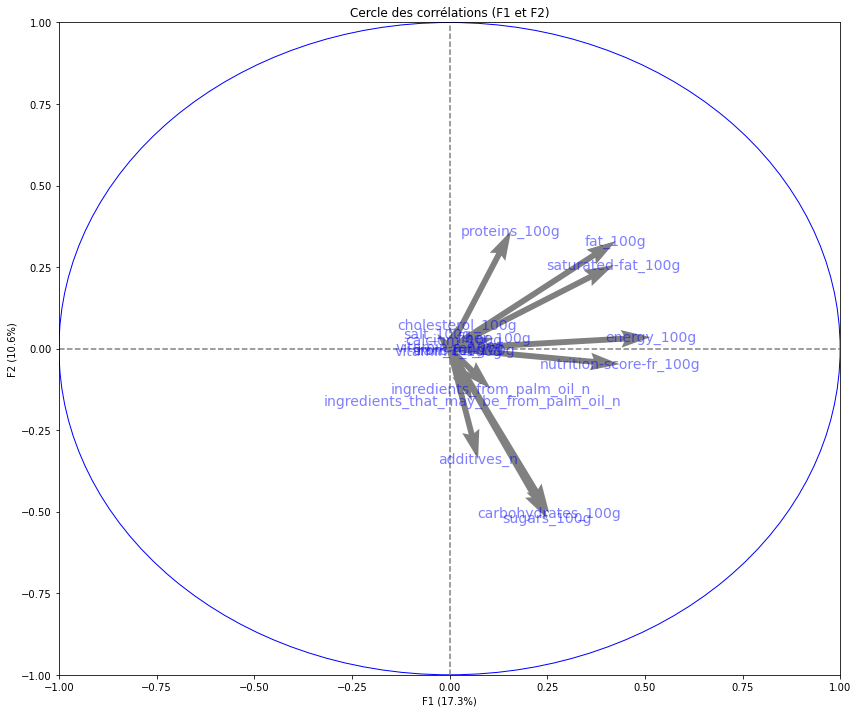

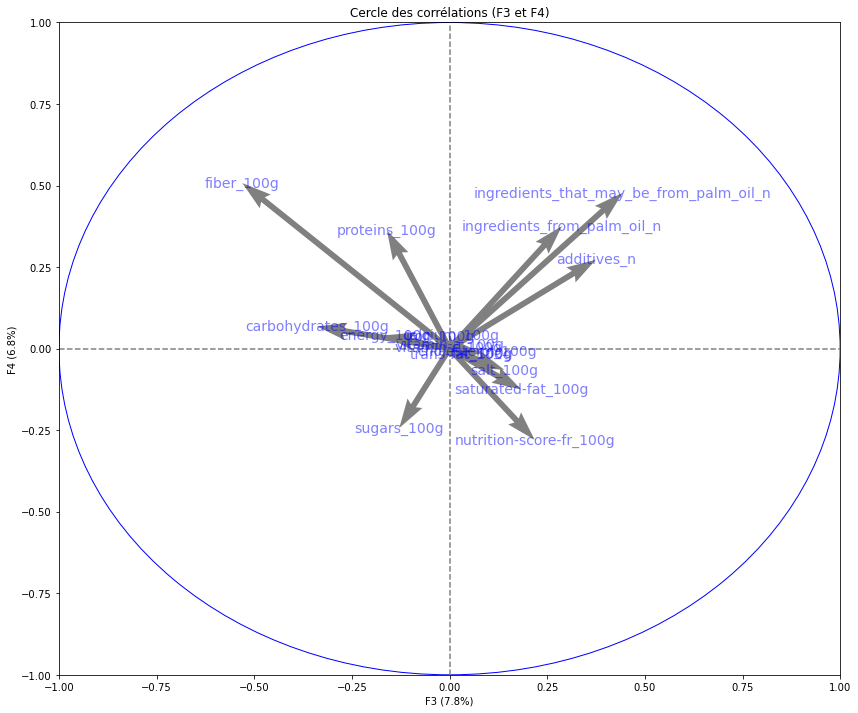

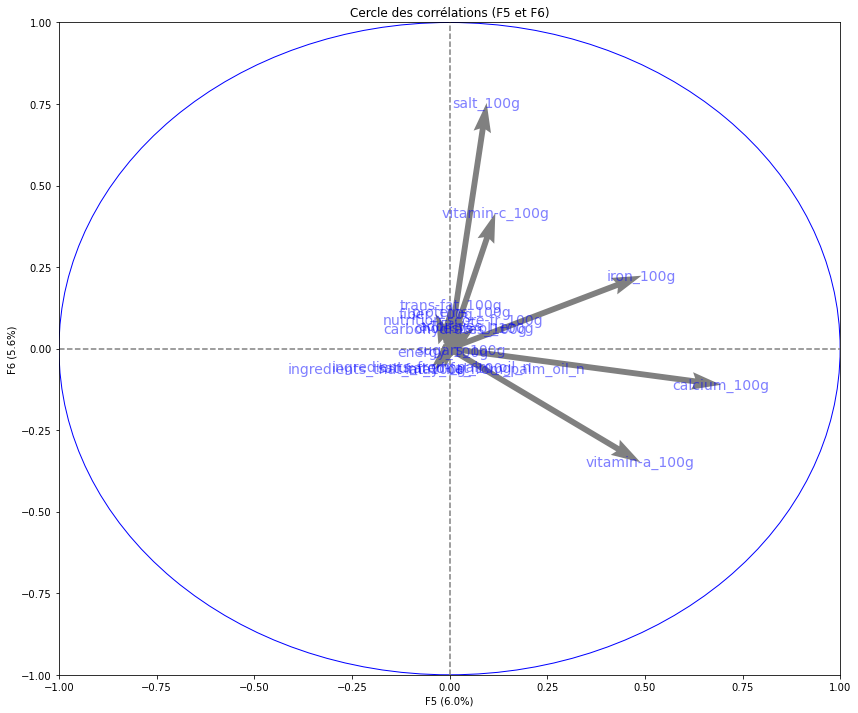

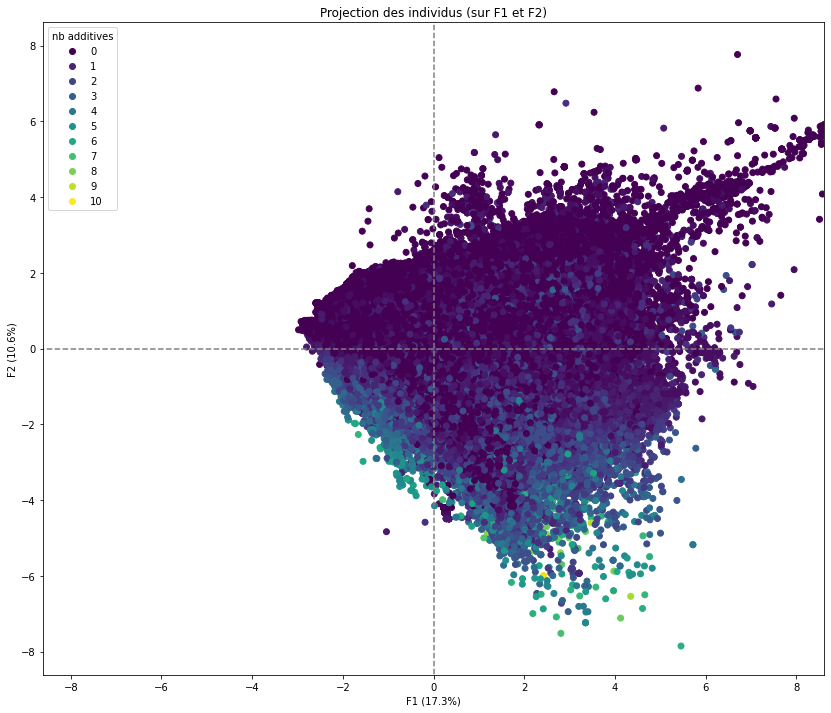

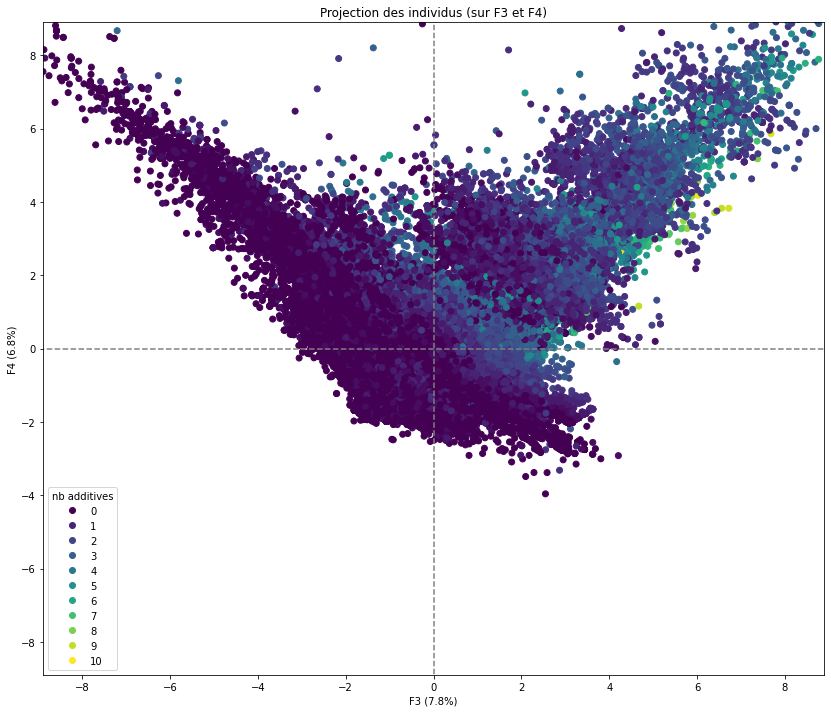

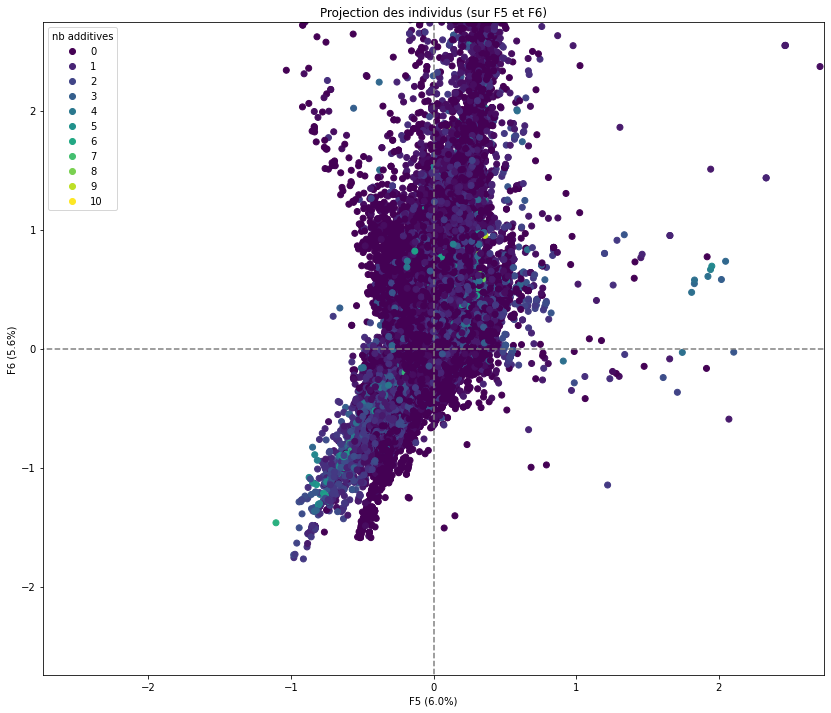

In [28]:
nb_comp = 6
scale_factor = 2


data_pca = df[quantitative_columns]
names = data_pca.index
features = data_pca.columns

# convert to numpy array
X = data_pca.values

# normalize
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

# PCA
pca = decomposition.PCA(n_components=nb_comp)
pca.fit(X)

# éboulis
pca_pf.display_scree_plot(pca, scale_factor=scale_factor)

# cercle corrélations
values = [(0,1),(2,3),(4,5)]
comp = pca.components_
pca_pf.display_circles(comp, nb_comp, pca, values, 
                       labels = np.array(features), 
                       scale_factor=scale_factor)

# projection individus
X_projected = pca.transform(X)
pca_pf.display_factorial_planes(X_projected, nb_comp, pca, values, data_pca, 
                                scale_factor=scale_factor)

plt.show()

### Comments on PCA<br>

#### F1-F2:<br><br>- additives_n and nutri-score are almost orthogonal (could mean that the nutri-score is not a good indicator for the number of additives)<br>- nutri-score and energy are together (the formula of nutri-score favors low energy foods)

#### F3-F4:<br><br>- additives_n and nutri-score are almost orthogonal (again)<br>- additives_n is close to ingredients_from_palm_oil_n (could mean that unhealthy products are usually unhealthy in multiple ways)

#### F5-F6:<br><br>- not usefull for this project<br>